*Persiapan PUSTAKA*

In [3]:
print ("hello")

hello


In [1]:
%pip install numpy

  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/fc/84/7f801a42a67b9772a883223a0a1e12069a14626c81a732bd70aac57aebc1/numpy-2.2.2-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 330.3 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/60.8 kB 440.4 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 361.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.6 MB 2.6 MB/s eta 0:00:05
    --------------------------------------- 0.3/12.6 MB 4.6 MB/s eta 0:00:03
   - -------------------------------------- 0.5/12.6 MB 4.0 MB/s eta 0:00:04
   - -------------------------------------- 0.5/12.6 MB 3.4 MB/s eta 0:00:04
   - ----------------------------


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [8]:
# Variabel input (kualitas dan permintaan) dan output (harga)
kualitas = ctrl.Antecedent(np.arange(0, 11, 1), 'kualitas')
permintaan = ctrl.Antecedent(np.arange(0, 11, 1), 'permintaan')
harga = ctrl.Consequent(np.arange(0, 101, 1), 'harga')


In [9]:
# Membership function untuk permintaan
permintaan['rendah'] = fuzz.trimf(permintaan.universe, [0, 0, 5])
permintaan['sedang'] = fuzz.trimf(permintaan.universe, [2, 5, 8])
permintaan['tinggi'] = fuzz.trimf(permintaan.universe, [5, 10, 10])


In [15]:
# Membership function untuk kualitas
kualitas['rendah'] = fuzz.trimf(kualitas.universe, [0, 0, 5])
kualitas['sedang'] = fuzz.trimf(kualitas.universe, [2, 5, 8])
kualitas['tinggi'] = fuzz.trimf(kualitas.universe, [5, 10, 10])


In [12]:
# Membership function untuk harga
harga['murah'] = fuzz.trimf(harga.universe, [0, 0, 50])
harga['sedang'] = fuzz.trimf(harga.universe, [20, 50, 80])
harga['mahal'] = fuzz.trimf(harga.universe, [50, 100, 100])

In [16]:
# Rules (aturan fuzzy)
rule1 = ctrl.Rule(kualitas['rendah'] & permintaan['rendah'], harga['murah'])
rule2 = ctrl.Rule(kualitas['rendah'] & permintaan['sedang'], harga['murah'])
rule3 = ctrl.Rule(kualitas['rendah'] & permintaan['tinggi'], harga['sedang'])
rule4 = ctrl.Rule(kualitas['sedang'] & permintaan['rendah'], harga['murah'])
rule5 = ctrl.Rule(kualitas['sedang'] & permintaan['sedang'], harga['sedang'])
rule6 = ctrl.Rule(kualitas['sedang'] & permintaan['tinggi'], harga['mahal'])
rule7 = ctrl.Rule(kualitas['tinggi'] & permintaan['rendah'], harga['sedang'])
rule8 = ctrl.Rule(kualitas['tinggi'] & permintaan['sedang'], harga['mahal'])
rule9 = ctrl.Rule(kualitas['tinggi'] & permintaan['tinggi'], harga['mahal'])


In [17]:
# Sistem kontrol
harga_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
prediksi_harga = ctrl.ControlSystemSimulation(harga_ctrl)

# Input nilai kualitas dan permintaan
prediksi_harga.input['kualitas'] = 7
prediksi_harga.input['permintaan'] = 6

# Hitung hasil
prediksi_harga.compute()
print(f"Harga yang disarankan: {prediksi_harga.output['harga']:.2f}")

Harga yang disarankan: 64.13


c:\Users\ASUS\OneDrive\Documents\AI_Fuzzy\myenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


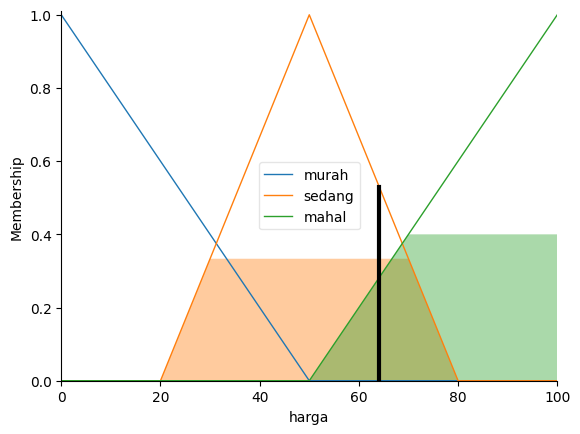

In [18]:
# Visualisasi
harga.view(sim=prediksi_harga)
plt.show()


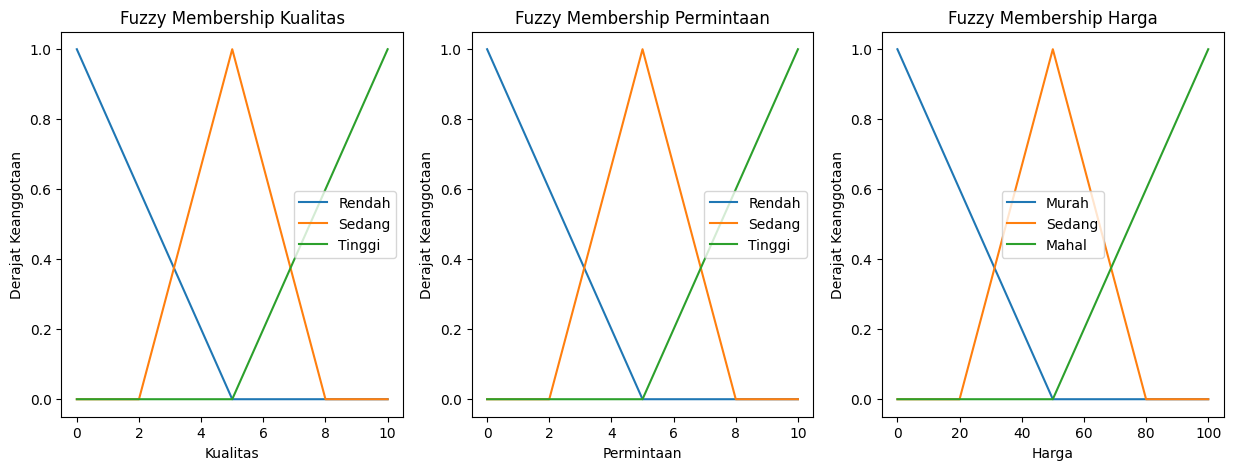

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].plot(kualitas.universe, fuzz.trimf(kualitas.universe, [0, 0, 5]), label='Rendah')
axes[0].plot(kualitas.universe, fuzz.trimf(kualitas.universe, [2, 5, 8]), label='Sedang')
axes[0].plot(kualitas.universe, fuzz.trimf(kualitas.universe, [5, 10, 10]), label='Tinggi')
axes[0].set_title('Fuzzy Membership Kualitas')
axes[0].set_xlabel('Kualitas')
axes[0].set_ylabel('Derajat Keanggotaan')
axes[0].legend()

axes[1].plot(permintaan.universe, fuzz.trimf(permintaan.universe, [0, 0, 5]), label='Rendah')
axes[1].plot(permintaan.universe, fuzz.trimf(permintaan.universe, [2, 5, 8]), label='Sedang')
axes[1].plot(permintaan.universe, fuzz.trimf(permintaan.universe, [5, 10, 10]), label='Tinggi')
axes[1].set_title('Fuzzy Membership Permintaan')
axes[1].set_xlabel('Permintaan')
axes[1].set_ylabel('Derajat Keanggotaan')
axes[1].legend()

axes[2].plot(harga.universe, fuzz.trimf(harga.universe, [0, 0, 50]), label='Murah')
axes[2].plot(harga.universe, fuzz.trimf(harga.universe, [20, 50, 80]), label='Sedang')
axes[2].plot(harga.universe, fuzz.trimf(harga.universe, [50, 100, 100]), label='Mahal')
axes[2].set_title('Fuzzy Membership Harga')
axes[2].set_xlabel('Harga')
axes[2].set_ylabel('Derajat Keanggotaan')
axes[2].legend()

plt.show()

<h1> Requrements yang diperlukan<h1>